# 1. Working with shape file and plotting using latitude and longitude

### Importing necessary packages

In [1]:
# This is a test file
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import pyproj
import pyproj
pyproj.Proj("+init=epsg:4326")

# important to remember: 3857 = meters & 4326 = degree
# To change the crs, use the following command: hotel_geo.to_crs({'init': 'epsg:3857'})

/Users/atmsayfuddin/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:280: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(projparams)


<Other Coordinate Operation Transformer: longlat>
Description: PROJ-based coordinate operation
Area of Use:
- undefined

### Loading hotel data

In [2]:
# loading hotel data 
hotel = pd.read_csv('dataset.csv')
hotel['geometry'] = hotel.apply(lambda x: Point((x.longitude, x.latitude)), axis = 1)

# Setting the coordinate reference system for the hotel data
hotel_crs = {'init':'epsg:4326'}
hotel_geo = gpd.GeoDataFrame(hotel, crs = hotel_crs, geometry = hotel.geometry)
hotel_geo.head(2)

,Name,street_address,city,state,zip_code,post_code,latitude,longitude,green,geometry
0,Comfort Inn Near Old Town Pasadena In Eagle Rock,2300 Colorado Blvd,Los Angeles,California,90041,90041-1145,34.139088,-118.216775,1,POINT (-118.21677 34.13909)
1,W Hotel Hollywood,6250 Hollywood Blvd,Los Angeles,California,90028,90028-5309,34.100955,-118.325830,1,POINT (-118.32583 34.10096)


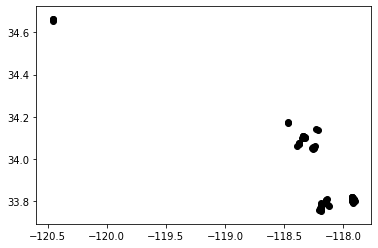

In [3]:
# You can show this data using a scatterplot
plt.scatter(x = hotel_geo.longitude, y = hotel_geo.latitude, c = 'black')

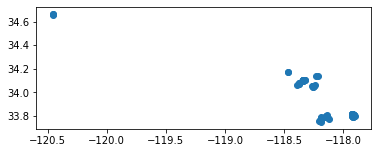

In [4]:
# Or, you can use geopandas.plot() command to do the same. Note that this command is using the geometry column 
# of the dataframe to plot.
hotel_geo.plot()

### Loading the map data for California

In [5]:
# loading california map data and changing crs to the same crs as the hotel data above
cal = gpd.read_file('CA_Counties_TIGER2016.shp')
cal.to_crs(epsg = 4326,inplace = True)
cal.head(2)

/Users/atmsayfuddin/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,091,00277310,06091,Sierra,Sierra County,06,H1,G4020,None,None,None,A,2468694587,23299110,+39.5769252,-120.5219926,"POLYGON ((-120.65560 39.69357, -120.65554 39.6..."
1,06,067,00277298,06067,Sacramento,Sacramento County,06,H1,G4020,472,40900,None,A,2499183617,76073827,+38.4500114,-121.3404409,"POLYGON ((-121.18858 38.71431, -121.18732 38.7..."


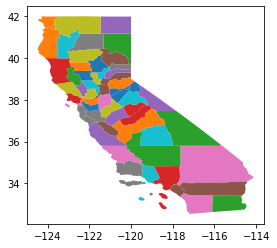

In [6]:
# Plotting a map of California
cal.plot(column = 'NAME')

### Showing the locations of the hotels on the map of California

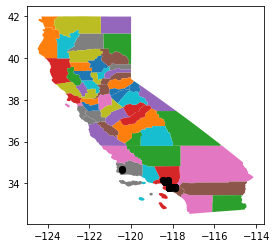

In [7]:
ax = cal.plot(column = 'NAME')
hotel_geo.plot( ax = ax, alpha = 0.9, color = "black")
plt.show()

You can also plot for only the counties where the hotels are located. I have manually checked to find out the county names where the hotels are located. The following codes shows hotel locations for only their corresponding counties.

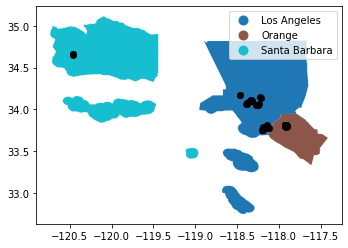

In [8]:
ax = cal[cal['NAME'].isin(['Los Angeles','Santa Barbara','Orange'])].plot(column = 'NAME', legend = True)
hotel_geo.plot( ax = ax, alpha = 0.9, color = "black")
plt.show()

If you want to use the scatterplot command instead, you can use the the following line of code, which will produce the same map.

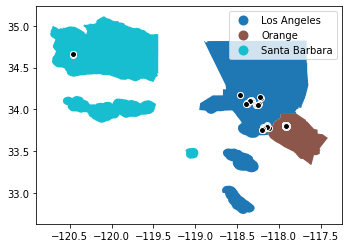

In [9]:
ax = cal[cal['NAME'].isin(['Los Angeles','Santa Barbara','Orange'])].plot(column = 'NAME', legend = True)
plt.scatter(x = hotel_geo.longitude, y = hotel_geo.latitude, c = 'black', edgecolor = 'white')
plt.show()

If you want the legend ouside of the box, then use the following command:

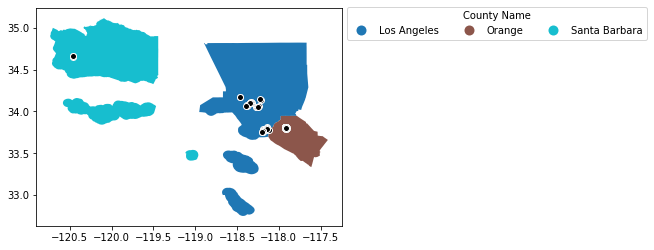

In [10]:
leg_kwds = {'title':'County Name',
           'loc': 'upper left',
           'bbox_to_anchor':(1, 1.03),
           'ncol': 3}
ax = cal[cal['NAME'].isin(['Los Angeles','Santa Barbara','Orange'])].plot(column = 'NAME', 
                                                                          legend = True, legend_kwds=leg_kwds)
plt.scatter(x = hotel_geo.longitude, y = hotel_geo.latitude, c = 'black', edgecolor = 'white')
plt.show()

# 2. Working with GeoJSON
The advantage of GeoJSON over shapefiles is:
* The file is human readable, so you can open it in a text editor and understand the contents.
* The file stands alone and doesn't rely on other files.
* GeoJSON supports multi-part geometries.

In this part of the exercise we will work with GeoJSON data. You can either load a GeoJSON file directly from your computer, or import it from an online link. Here, we will load a dataset from a web link. 

In [11]:
import requests, json

# Creating a function to get a GeoJSON data directly from the web
# For loading the data from your computer, use the following command: gpd.read_file()
def remoteGeoJSONToGDF(url, display = False):
    """Import remote GeoJSON to a GeoDataFrame
    Keyword arguments:
    url -- URL to GeoJSON resource on web
    display -- Displays geometries upon loading (default: False)
    """
    r = requests.get(url)
    data = r.json()
    gdf = gpd.GeoDataFrame.from_features(data['features'])
    if display:
        gdf.plot()
    return gdf

url = 'https://assets.datacamp.com/production/repositories/2409/datasets/9ea668811fb71fa77ad29362ea5299f05ad150af/school_districts.geojson'
school_dist = remoteGeoJSONToGDF(url)
school_dist.head(1)

,geometry,first_name,city,zip,email,state,last_name,address,position,term_expir,district,phone
0,"MULTIPOLYGON (((-86.77136 36.38357, -86.77134 ...",Dr. Sharon,Nashville,37218,gentryfordistrict1@comcast.net,TN,Gentry,6108 Beals Lane,Member,2016,1,615-268-5269


# 3. How to Join two geo-dataframes and analyze

In [12]:
from IPython.display import IFrame
IFrame("https://sayfuddin.com/wp-content/uploads/2019/06/spatialJoins.pdf", width = 980, height = 600)

# 4. Creating a choropleth building permit density in Nashville

In [13]:
# Getting "building permits" data (in .csv format) directly from the web
url2 = 'https://assets.datacamp.com/production/repositories/2409/datasets/b8781d54c145e27ce43442bc6b327ac64158ebd6/building_permits_2017.csv'
permits = pd.read_csv(url2, sep = ',')
permits.head()

,permit_id,issued,cost,lat,lng
0,2017032777,2017-05-24,226201.0,36.198241,-86.742235
1,2017061156,2017-10-23,15000.0,36.151554,-86.830222
2,2017074521,2017-11-20,13389.0,36.034239,-86.708892
3,2017035041,2017-05-30,40000.0,36.128659,-86.841815
4,2017000049,2017-01-09,268107.0,36.045042,-86.616211


In [14]:
# Loading council district data
council_districts = gpd.read_file("council_districts.geojson")
council_districts.head()

,first_name,email,res_phone,bus_phone,last_name,position,district,geometry
0,Nick,nick.leonardo@nashville.gov,615-509-6334,615-862-6780,Leonardo,Council Member,1,"MULTIPOLYGON (((-86.90738 36.39052, -86.90725 ..."
1,DeCosta,decosta.hastings@nashville.gov,615-779-1565,615-862-6780,Hastings,Council Member,2,"MULTIPOLYGON (((-86.75902 36.23091, -86.75909 ..."
2,Nancy,nancy.vanreece@nashville.gov,615-576-0488,615-862-6780,VanReece,Council Member,8,"MULTIPOLYGON (((-86.72850 36.28328, -86.72791 ..."
3,Bill,bill.pridemore@nashville.gov,615-915-1419,615-862-6780,Pridemore,Council Member,9,"MULTIPOLYGON (((-86.68681 36.28671, -86.68706 ..."
4,Robert,robert.swope@nashville.gov,615-308-0577,615-862-6780,Swope,Council Member,4,"MULTIPOLYGON (((-86.74489 36.05316, -86.74491 ..."


## 4.1 Finding counts from a spatial join

You will be using a dataset of the building permits issued in Nashville during 2017. This DataFrame called permits is in your workspace along with the council_districts GeoDataFrame.

In [15]:
from shapely.geometry import Point

# Create a shapely Point from lat and lng
permits['geometry'] = permits.apply(lambda x: Point((x.lng , x.lat)), axis = 1)

# Build a GeoDataFrame: permits_geo
permits_geo = gpd.GeoDataFrame(permits, crs = council_districts.crs, geometry = permits.geometry)

# Spatial join of permits_geo and council_districts
permits_by_district = gpd.sjoin(permits_geo, council_districts, op = 'within')
print(permits_by_district.head(2))

     permit_id      issued      cost        lat        lng  \
0   2017032777  2017-05-24  226201.0  36.198241 -86.742235   
68  2017053890  2017-09-05       0.0  36.185442 -86.768239   

                      geometry  index_right first_name  \
0   POINT (-86.74223 36.19824)            5      Scott   
68  POINT (-86.76824 36.18544)            5      Scott   

                        email     res_phone     bus_phone last_name  \
0   scott.davis@nashville.gov  615-554-9730  615-862-6780     Davis   
68  scott.davis@nashville.gov  615-554-9730  615-862-6780     Davis   

          position district  
0   Council Member        5  
68  Council Member        5  


In [16]:
# Create permit_counts
permit_counts = permits_by_district.groupby(['district']).size()
permit_counts.head()

district
1     146
10    119
11    239
12    163
13    139
dtype: int64

## 4.2 Council district areas and permit counts

In order to create a normalized value for the building permits issued in each council district, you will need to find the area of each council district. Remember that you can leverage the area attribute of a GeoSeries to do this. You will need to convert permit_counts to a DataFrame so you can merge it with the council_districts data. Both permit_counts and council_districts are in your workspace.

In [17]:
# Create an area column in council_districts
council_districts['area'] = council_districts.geometry.area
council_districts.head(2)

,first_name,email,res_phone,bus_phone,last_name,position,district,geometry,area
0,Nick,nick.leonardo@nashville.gov,615-509-6334,615-862-6780,Leonardo,Council Member,1,"MULTIPOLYGON (((-86.90738 36.39052, -86.90725 ...",0.022786
1,DeCosta,decosta.hastings@nashville.gov,615-779-1565,615-862-6780,Hastings,Council Member,2,"MULTIPOLYGON (((-86.75902 36.23091, -86.75909 ...",0.002927


In [18]:
# Convert permit_counts to a DataFrame
permits_df = permit_counts.to_frame()
print(permits_df.head(2))

            0
district     
1         146
10        119


In [19]:
# Reset index and column names
permits_df.reset_index(inplace=True)
permits_df.columns = ['district', 'bldg_permits']
print(permits_df.head(2))

  district  bldg_permits
0        1           146
1       10           119


In [20]:
# Merge council_districts and permits_df: 
# IMPORTANT: when merging geodataframe with normal dataframe, geodataframe has to be the first argument if you want
# the merged dataframe to be a geodataframe
districts_and_permits = pd.merge(council_districts, permits_df, on = 'district')
print(districts_and_permits.head(2))

  first_name                           email     res_phone     bus_phone  \
0       Nick     nick.leonardo@nashville.gov  615-509-6334  615-862-6780   
1    DeCosta  decosta.hastings@nashville.gov  615-779-1565  615-862-6780   

  last_name        position district  \
0  Leonardo  Council Member        1   
1  Hastings  Council Member        2   

                                            geometry      area  bldg_permits  
0  MULTIPOLYGON (((-86.90738 36.39052, -86.90725 ...  0.022786           146  
1  MULTIPOLYGON (((-86.75902 36.23091, -86.75909 ...  0.002927           399  


## 4.3 Calculating a normalized metric

Now you are ready to divide the number of building permits issued for projects in each council district by the area of that district to get a normalized value for the permits issued (i.e., permits issued in per unit of area). First you will verify that the districts_and_permits is still a GeoDataFrame.

In [21]:
# Create permit_density column in districts_and_permits
districts_and_permits['permit_density'] = districts_and_permits.apply(
    lambda row: row.bldg_permits / row.area, axis = 1)
print(districts_and_permits.head(2))

  first_name                           email     res_phone     bus_phone  \
0       Nick     nick.leonardo@nashville.gov  615-509-6334  615-862-6780   
1    DeCosta  decosta.hastings@nashville.gov  615-779-1565  615-862-6780   

  last_name        position district  \
0  Leonardo  Council Member        1   
1  Hastings  Council Member        2   

                                            geometry      area  bldg_permits  \
0  MULTIPOLYGON (((-86.90738 36.39052, -86.90725 ...  0.022786           146   
1  MULTIPOLYGON (((-86.75902 36.23091, -86.75909 ...  0.002927           399   

   permit_density  
0     6407.401089  
1   136305.586710  


## 4.4 Geopandas choropleths

First you will plot a choropleth of the building permit density for each council district using the default colormap. Then you will polish it by changing the colormap and adding labels and a title.

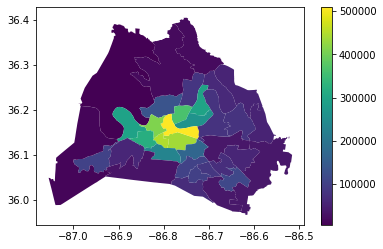

In [22]:
# Simple plot of building permit_density
districts_and_permits.plot(column = 'permit_density', legend = True);
plt.show();


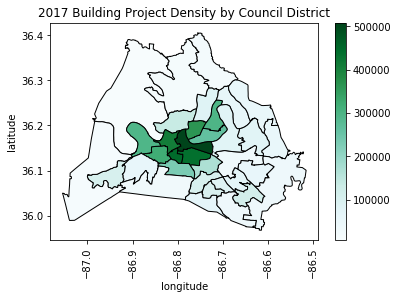

In [23]:
# Polished choropleth of building permit_density
districts_and_permits.plot(column = 'permit_density', cmap = 'BuGn', edgecolor = 'black', legend = True)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.xticks(rotation = 'vertical')
plt.title('2017 Building Project Density by Council District')
plt.show();

# 4.5 Area in km squared, geometry in decimal degrees

In this exercise, you'll start again with the council_districts GeoDataFrame and the permits DataFrame. You will change the council_districts to use the EPSG 3857 coordinate reference system before creating a column for area. Once the area column has been created, you will change the CRS back to EPSG 4326 so that the geometry is in decimal degrees.

In [24]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Getting "building permits" data (in .csv format) directly from the web
url2 = 'https://assets.datacamp.com/production/repositories/2409/datasets/b8781d54c145e27ce43442bc6b327ac64158ebd6/building_permits_2017.csv'
permits = pd.read_csv(url2, sep = ',')
permits.head()

# Loading council district data
council_districts = gpd.read_file("council_districts.geojson")
council_districts.head()

# Change council_districts crs to epsg 3857 (this one's unit is meter)
council_districts = council_districts.to_crs(epsg = 3857)

# Create area in square km
council_districts['area'] = council_districts.geometry.area/10**6


# Change council_districts crs back to epsg 4326 (this one's unit is degree)
council_districts = council_districts.to_crs(epsg = 4326)

/Users/atmsayfuddin/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/Users/atmsayfuddin/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


# 4.6 Spatially joining and getting counts

You will continue preparing your dataset for plotting a geopandas choropleth by creating a GeoDataFrame of the building permits spatially joined to the council districts. After that, you will be able to get counts of the building permits issued in each council district.

In [25]:
from shapely.geometry import Point

# Create a shapely Point from lat and lng
permits['geometry'] = permits.apply(lambda x: Point((x.lng , x.lat)), axis = 1)

# Build a GeoDataFrame: permits_geo
permits_geo = gpd.GeoDataFrame(permits, crs = council_districts.crs, geometry = permits.geometry)

# Spatially join permits_geo and council_districts
permits_by_district = gpd.sjoin(permits_geo, council_districts, op = 'within')
print(permits_by_district.head(2))

# Count permits in each district
permit_counts = permits_by_district.groupby('district').size()

# Convert permit_counts to a df with 2 columns: district and bldg_permits
counts_df = permit_counts.to_frame()
counts_df.reset_index(inplace=True)
counts_df.columns = ['district', 'bldg_permits']

     permit_id      issued      cost        lat        lng  \
0   2017032777  2017-05-24  226201.0  36.198241 -86.742235   
68  2017053890  2017-09-05       0.0  36.185442 -86.768239   

                      geometry  index_right first_name  \
0   POINT (-86.74223 36.19824)            5      Scott   
68  POINT (-86.76824 36.18544)            5      Scott   

                        email     res_phone     bus_phone last_name  \
0   scott.davis@nashville.gov  615-554-9730  615-862-6780     Davis   
68  scott.davis@nashville.gov  615-554-9730  615-862-6780     Davis   

          position district       area  
0   Council Member        5  19.030612  
68  Council Member        5  19.030612  


# 4.7 Building a polished Geopandas choropleth (per square km)

After merging the counts_df with permits_by_district, you will create a column with normalized permit_density by dividing the count of permits in each council district by the area of that council district. Then you will plot your final geopandas choropleth of the building projects in each council district.

  first_name                           email     res_phone     bus_phone  \
0       Nick     nick.leonardo@nashville.gov  615-509-6334  615-862-6780   
1    DeCosta  decosta.hastings@nashville.gov  615-779-1565  615-862-6780   

  last_name        position district  \
0  Leonardo  Council Member        1   
1  Hastings  Council Member        2   

                                            geometry        area  \
0  MULTIPOLYGON (((-86.90738 36.39052, -86.90725 ...  350.194851   
1  MULTIPOLYGON (((-86.75902 36.23091, -86.75909 ...   44.956987   

   bldg_permits  permit_density  
0           146        0.416911  
1           399        8.875150  


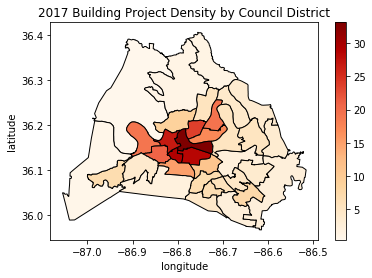

In [26]:
# Merge permits_by_district and counts_df
districts_and_permits = pd.merge(council_districts, counts_df, on = 'district')

# Create permit_density column
districts_and_permits['permit_density'] = districts_and_permits.apply(lambda row: row.bldg_permits/row.area, axis = 1)
print(districts_and_permits.head(2))

# Create choropleth plot
districts_and_permits.plot(column = 'permit_density', cmap = 'OrRd', edgecolor = 'black', legend = True)

# Add axis labels and title
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('2017 Building Project Density by Council District')
plt.show()

In the above choropleth, we see that in the central region there are more than 30 schools per square kilometer. 

# 5. GeoSeries and folium
First you will learn to get information about the geometries in your data with three different GeoSeries attributes and methods. Then you will learn to create a street map layer using folium.

## 5.1 Get the area of polygons (in square kilometer) [assuming the polygons are in degrees ]

In [29]:
# Loading necessary modules
from shapely.geometry import Point
import geopandas as gpd
import pandas as pd

# Loading california data
cal = gpd.read_file('CA_Counties_TIGER2016.shp')
la = cal[cal.loc[:,'NAME'] == 'Los Angeles']

# adding a column for the center of L.A.
la.loc[:,'center'] = la.loc[:,'geometry'].centroid

# loading hotel data 
hotel = pd.read_csv('dataset.csv')
hotel.loc[:,'geometry'] = hotel.apply(lambda x: Point((x.longitude, x.latitude)), axis = 1)

# Setting the coordinate reference system for the hotel data
hotel_geo = gpd.GeoDataFrame(hotel, crs = {'init':'epsg:4326'}, geometry = hotel.geometry)
hotel_geo = hotel_geo.to_crs({'init': 'epsg:3857'})
hotel_geo = hotel_geo[hotel_geo.loc[:,'city'] == 'Los Angeles']

# check if both "hotel_geo" and "la" dataframes have the same crs. 
print(hotel_geo.crs)
print(la.crs)

/Users/atmsayfuddin/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/atmsayfuddin/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/Users/atmsayfuddin/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the pref

{'init': 'epsg:3857'}
{'init': 'epsg:3857'}


In [30]:
# Now, spatially join both the dataframes
la_hotels = gpd.sjoin(hotel_geo, la, op = 'intersects')

# now adding a street map
import pprint
distances = {}
for row in la_hotels.iterrows():
    vals = row[1]
    key = vals['Name']
    ctr = vals['center']
    distances[key] = vals['geometry'].distance(ctr)


import folium

# find out the centroid of L.A. using the .centroid command --> la['center'] = la.geometry.centroid
# IMPORTANT: in folium, the first argument should be latitude and then longitude. 
la_center = folium.Map(location = [34.19800634875832, -118.2610291717207], zoom_start=8,) # the center of L.A. found by using the "la['center'] = la.geometry.centroid" code
a = display(la_center)

### Now adding a the L.A. county layer on the map. 

In [32]:
folium.GeoJson(la.geometry).add_to(la_center)

/Users/atmsayfuddin/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [33]:
# now show the map
display(la_center)

## 5.2 Creating markers and popups in folium

In [34]:
for row in hotel_geo.iterrows():
    row_values = row[1]
    location = [row_values['latitude'], row_values['longitude']]
    marker = folium.Marker(location  = location)
    marker.add_to(la_center)

# Now you can display the map
display(la_center)

In [35]:
# Now you can add popups with information about the hotels to the map

for row in hotel_geo.iterrows():
    row_values = row[1]
    location = [row_values['latitude'], row_values['longitude']]
    popup = '<strong>' + row_values['Name'] +'. Addess: ' + row_values['street_address'] + '</strong>' # html tag is used to choose the text styling of popups
    marker = folium.Marker(location  = location, popup = popup)
    marker.add_to(la_center)

# display the map with more information
display(la_center)

# 6. Choropleth with Folium

In [42]:
# Center point and map for Nashville
nashville = [36.1636, -86.7823]
m = folium.Map(location=nashville, zoom_start=10)

# Define a choropleth layer for the map
m.choropleth(
    geo_data=districts_and_permits,
    name='geometry',
    data=districts_and_permits,
    columns=['district', 'permit_density'], 
    key_on='feature.properties.district', 
    fill_color='YlGn',
    fill_opacity=0.5,
    line_opacity=0.5,
    legend_name = "Schools per km squared by School District"
    )

# Add layer control and display
folium.LayerControl().add_to(m) 
display(m)

/Users/atmsayfuddin/opt/anaconda3/lib/python3.7/site-packages/folium/folium.py:413: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning
/Users/atmsayfuddin/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [34]:
districts_and_permits.head()

,first_name,email,res_phone,bus_phone,last_name,position,district,geometry,area,bldg_permits,permit_density
0,Nick,nick.leonardo@nashville.gov,615-509-6334,615-862-6780,Leonardo,Council Member,1,"MULTIPOLYGON (((-86.90738 36.39052, -86.90725 ...",350.194851,146,0.416911
1,DeCosta,decosta.hastings@nashville.gov,615-779-1565,615-862-6780,Hastings,Council Member,2,"MULTIPOLYGON (((-86.75902 36.23091, -86.75909 ...",44.956987,399,8.875150
2,Nancy,nancy.vanreece@nashville.gov,615-576-0488,615-862-6780,VanReece,Council Member,8,"MULTIPOLYGON (((-86.72850 36.28328, -86.72791 ...",38.667932,209,5.404995
3,Bill,bill.pridemore@nashville.gov,615-915-1419,615-862-6780,Pridemore,Council Member,9,"MULTIPOLYGON (((-86.68681 36.28671, -86.68706 ...",44.295293,186,4.199092
4,Robert,robert.swope@nashville.gov,615-308-0577,615-862-6780,Swope,Council Member,4,"MULTIPOLYGON (((-86.74489 36.05316, -86.74491 ...",31.441618,139,4.420892
